In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('medical_appointments.csv')
print("Initial Missing Values:")
print(df.isnull().sum())

Initial Missing Values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


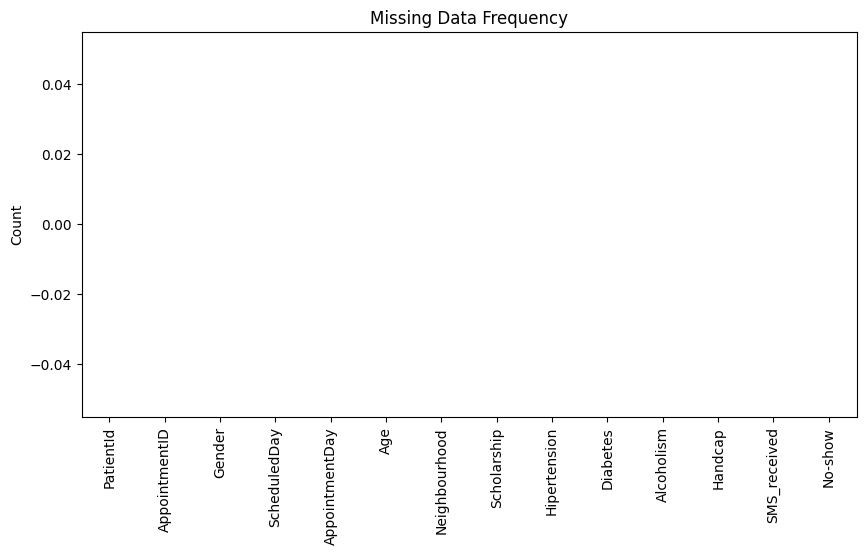

In [2]:
# Create a bar chart for missing values
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Missing Data Frequency")
plt.ylabel("Count")
plt.show()

In [3]:
# 3. Median Imputation for Numerical
df['Age'] = df['Age'].fillna(df['Age'].median())

# 4. Mode Imputation for Categorical (if any exist)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [4]:
# Drop unique IDs and columns with >80% missing data
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True, errors='ignore')

In [5]:
# 6. Validate cleaning
print("Missing values after cleaning:", df.isnull().sum().sum())

# 7. Compare size and quality
print(f"Cleaned Dataset Shape: {df.shape}")
df.to_csv('Cleaned_Medical_Data.csv', index=False)

Missing values after cleaning: 0
Cleaned Dataset Shape: (110527, 12)
